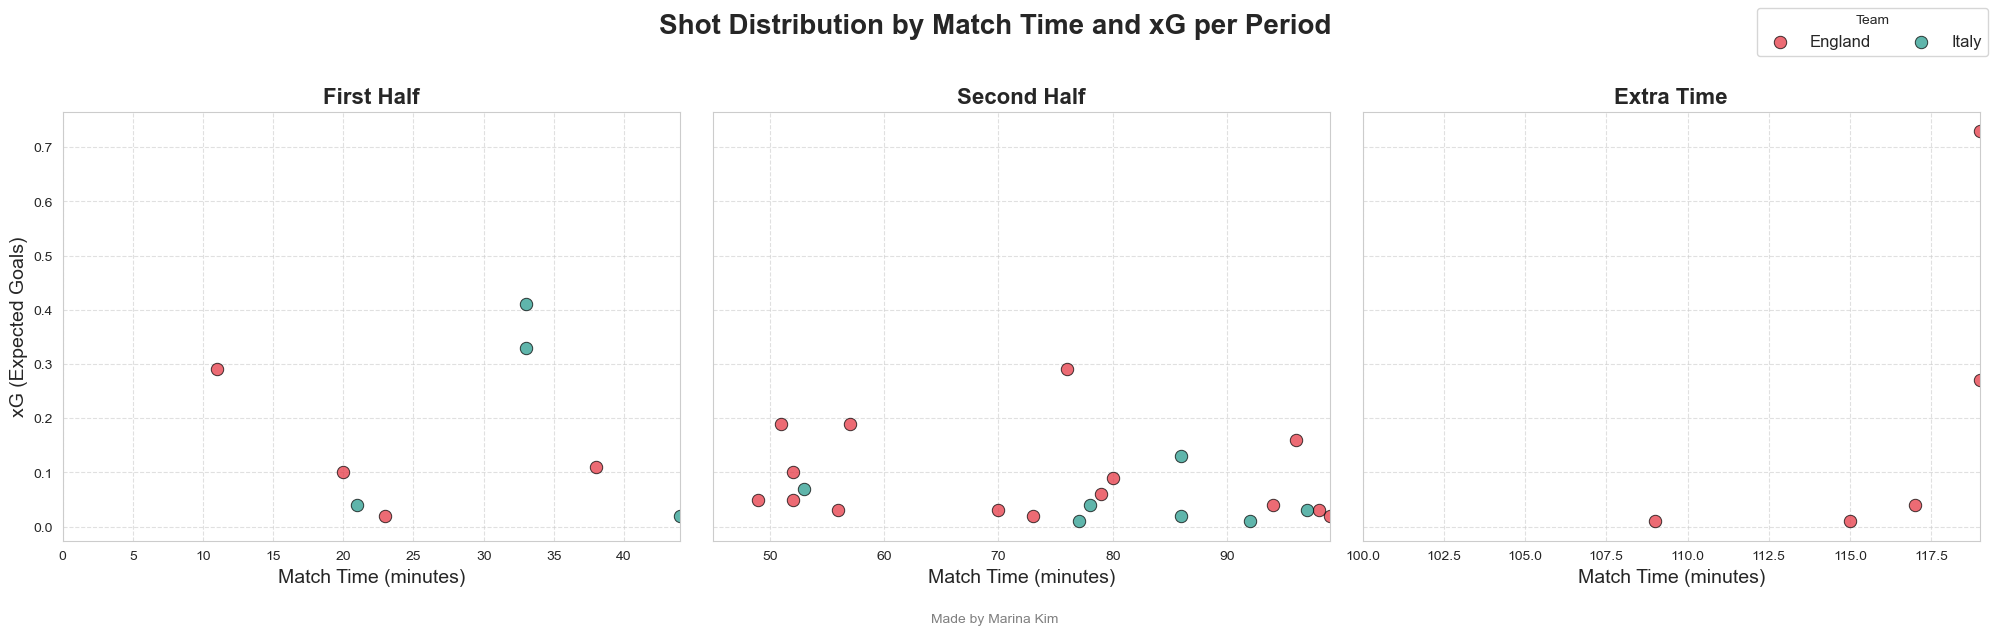

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df = pd.read_csv('eng_it_shots.csv')

def parse_minute(minute_str):
    if '+' in str(minute_str):
        base, extra = minute_str.split('+')
        return int(base) + int(extra)
    else:
        return int(minute_str)

df['MinuteParsed'] = df['Minute'].apply(parse_minute)

def period(minute):
    if minute <= 44:
        return 'First Half'
    elif minute <= 99:
        return 'Second Half'
    else:
        return 'Extra Time'

df['Period'] = df['MinuteParsed'].apply(period)

team_colors = {'England': '#E63946', 'Italy': '#2A9D8F'}
periods = ['First Half', 'Second Half', 'Extra Time']

# 구간별 x축 범위 설정
x_limits = {
    'First Half': (0, 44),
    'Second Half': (45, 99),
    'Extra Time': (100, df['MinuteParsed'].max())
}

fig, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)

for ax, period_name in zip(axes, periods):
    for team, color in team_colors.items():
        subset = df[(df['Team'] == team) & (df['Period'] == period_name)]
        ax.scatter(
            subset['MinuteParsed'], 
            subset['xG'], 
            color=color, 
            alpha=0.75, 
            label=team,
            edgecolors='k',
            linewidth=0.7,
            s=80
        )
    ax.set_title(period_name, fontsize=16, fontweight='bold')
    ax.set_xlabel('Match Time (minutes)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(x_limits[period_name])

axes[0].set_ylabel('xG (Expected Goals)', fontsize=14)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=12, title='Team')

fig.text(
    0.5, -0.02,
    'Made by Marina Kim',
    ha='center', va='top',
    fontsize=10, color='gray')

plt.suptitle('Shot Distribution by Match Time and xG per Period', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('eng_it_shots.png', dpi=300, bbox_inches='tight')
plt.show()
